### Kita akan membuat recommender system yang menggunakan Content/feature dari film/entitas tersebut, kemudian melakukan perhitungan terhadap kesamaannya satu dan yang lain sehingga ketika kita menunjuk ke satu film, kita akan mendapat beberapa film lain yang memiliki kesamaan dengan film tersebut. Hal ini biasa kita sebut sebagai Content Based Recommender System.

### Dengan membandingkan kesamaan plot yang ada dan genre yang ada, ketika audience lebih menyukai film Narnia, maka content based recommender system ini akan juga merekomendasikan film seperti Harry Potter atau The Lords of The Rings yang memiliki genre yang mirip.

In [1]:
# singkronisasi ke g-drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 1 - Unloading and Checking Datasets

#### [Import Basics Library and File Unloading](https://academy.dqlab.id/main/projectcode/214/392/1969?pr=0)

In [5]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np


#lakukan pembacaan dataset
movie_rating_df = pd.read_csv('/content/drive/MyDrive/AL. Lab/Sanca/Datasets/movie_rating_df.csv') #untuk menyimpan movie_rating_df.csv

#### [Menampilkan 5 data teratas dan info data](https://academy.dqlab.id/main/projectcode/214/392/1970?pr=0)

In [6]:
#tampilkan 5 baris teratas dari movive_rating_df
print(movie_rating_df.head())

#tampilkan info mengenai tipe data dari tiap kolom
print(movie_rating_df.info())

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult  startYear  endYear  runtimeMinutes                    genres  \
0        0     1894.0      NaN             1.0         Documentary,Short   
1        0     1892.0      NaN             5.0           Animation,Short   
2        0     1892.0      NaN             4.0  Animation,Comedy,Romance   
3        0     1892.0      NaN            12.0           Animation,Short   
4        0     1893.0      NaN             1.0              Comedy,Short   

   averageRating  numVotes  
0            5.6      1608  
1            6.0       197  
2          

#### [Add Actors Dataframe](https://academy.dqlab.id/main/projectcode/214/392/1971?pr=0)

In [7]:
pd.set_option('display.max_columns', None)

name_df = pd.read_csv('/content/drive/MyDrive/AL. Lab/Sanca/Datasets/actor_name.csv')

In [8]:
#tampilkan 5 baris teratas dari name_df
print(name_df.head())

#tampilkan info mengenai tipe data dari tiap kolom
print(name_df.info())

       nconst          primaryName birthYear deathYear  \
0   nm1774132    Nathan McLaughlin      1973        \N   
1  nm10683464        Bridge Andrew        \N        \N   
2   nm1021485    Brandon Fransvaag        \N        \N   
3   nm6940929   Erwin van der Lely        \N        \N   
4   nm5764974  Svetlana Shypitsyna        \N        \N   

                    primaryProfession                           knownForTitles  
0  special_effects,make_up_department  tt0417686,tt1713976,tt1891860,tt0454839  
1                               actor                                tt7718088  
2                       miscellaneous                                tt0168790  
3                       miscellaneous                                tt4232168  
4                             actress                                tt3014168  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------  

#### [Add Directors and Writers Dataframe](https://academy.dqlab.id/main/projectcode/214/392/1972?pr=0)

In [9]:
pd.set_option('display.max_columns', None)

director_writers = pd.read_csv('/content/drive/MyDrive/AL. Lab/Sanca/Datasets/directors_writers.csv')

In [10]:
#tampilkan 5 baris teratas dari director_writers
print(director_writers.head())

#tampilkan info mengenai tipe data dari tiap kolom
print(director_writers.info())

      tconst                   director_name  \
0  tt0011414                  David Kirkland   
1  tt0011890               Roy William Neill   
2  tt0014341  Buster Keaton,John G. Blystone   
3  tt0018054                Cecil B. DeMille   
4  tt0024151                     James Cruze   

                                       writer_name  
0                          John Emerson,Anita Loos  
1     Arthur F. Goodrich,Burns Mantle,Mary Murillo  
2  Jean C. Havez,Clyde Bruckman,Joseph A. Mitchell  
3                                Jeanie Macpherson  
4                 Max Miller,Wells Root,Jack Jevne  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tconst         986 non-null    object
 1   director_name  986 non-null    object
 2   writer_name    986 non-null    object
dtypes: object(3)
memory usage: 23.2+ KB
None


#### [Convert into List](https://academy.dqlab.id/main/projectcode/214/392/1973?pr=0)

In [11]:
#Mengubah director_name menjadi list
director_writers['director_name'] = director_writers['director_name'].apply(lambda row: row.split(','))
director_writers['writer_name'] = director_writers['writer_name'].apply(lambda row: row.split(','))

#Tampilkan 5 data teratas
print(director_writers.head())

      tconst                      director_name  \
0  tt0011414                   [David Kirkland]   
1  tt0011890                [Roy William Neill]   
2  tt0014341  [Buster Keaton, John G. Blystone]   
3  tt0018054                 [Cecil B. DeMille]   
4  tt0024151                      [James Cruze]   

                                         writer_name  
0                         [John Emerson, Anita Loos]  
1   [Arthur F. Goodrich, Burns Mantle, Mary Murillo]  
2  [Jean C. Havez, Clyde Bruckman, Joseph A. Mitc...  
3                                [Jeanie Macpherson]  
4               [Max Miller, Wells Root, Jack Jevne]  


## Task 2 - Cleaning and Processing Table Cast

#### [Update name_df](https://academy.dqlab.id/main/livecode/214/393/1974?pr=0)

In [12]:
#Kita hanya akan membutuhkan kolom nconst, primaryName, dan knownForTitles
name_df = name_df[['nconst','primaryName','knownForTitles']]

#Tampilkan 5 baris teratas dari name_df
print(name_df.head())

       nconst          primaryName                           knownForTitles
0   nm1774132    Nathan McLaughlin  tt0417686,tt1713976,tt1891860,tt0454839
1  nm10683464        Bridge Andrew                                tt7718088
2   nm1021485    Brandon Fransvaag                                tt0168790
3   nm6940929   Erwin van der Lely                                tt4232168
4   nm5764974  Svetlana Shypitsyna                                tt3014168


#### [Movies per Actor](https://academy.dqlab.id/main/livecode/214/393/1975?pr=0)

In [13]:
#Melakukan pengecekan variasi
print(name_df['knownForTitles'].apply(lambda x: len(x.split(','))).unique())

#Mengubah knownForTitles menjadi list of list
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

#Mencetak 5 baris teratas
print(name_df.head())

[4 1 2 3]
       nconst          primaryName  \
0   nm1774132    Nathan McLaughlin   
1  nm10683464        Bridge Andrew   
2   nm1021485    Brandon Fransvaag   
3   nm6940929   Erwin van der Lely   
4   nm5764974  Svetlana Shypitsyna   

                                 knownForTitles  
0  [tt0417686, tt1713976, tt1891860, tt0454839]  
1                                   [tt7718088]  
2                                   [tt0168790]  
3                                   [tt4232168]  
4                                   [tt3014168]  


### dapat dilihat bahwa seorang aktor dapat membintangi 1 sampai 4 film, diperlukan untuk membuat table yang mempunyai relasi 1-1 dari aktor ke masing-masing title movie tersebut

#### [Korespondensi 1 - 1](https://academy.dqlab.id/main/livecode/214/393/1976?pr=0)

In [14]:
#menyiapkan bucket untuk dataframe
df_uni = []

for x in ['knownForTitles']:
    #mengulang index dari tiap baris sampai tiap elemen dari knownForTitles
    idx = name_df.index.repeat(name_df['knownForTitles'].str.len())
   
   #memecah values dari list di setiap baris dan menggabungkan nya dengan rows lain menjadi dataframe
    df1 = pd.DataFrame({
        x: np.concatenate(name_df[x].values)
    })
    
    #mengganti index dataframe tersebut dengan idx yang sudah kita define di awal
    df1.index = idx
    #untuk setiap dataframe yang terbentuk, kita append ke dataframe bucket
    df_uni.append(df1)
    
#menggabungkan semua dataframe menjadi satu
df_concat = pd.concat(df_uni, axis=1)

#left join dengan value dari dataframe yang awal
unnested_df = df_concat.join(name_df.drop(['knownForTitles'], 1), how='left')

#select kolom sesuai dengan dataframe awal
unnested_df = unnested_df[name_df.columns.tolist()]
print(unnested_df)

         nconst        primaryName knownForTitles
0     nm1774132  Nathan McLaughlin      tt0417686
0     nm1774132  Nathan McLaughlin      tt1713976
0     nm1774132  Nathan McLaughlin      tt1891860
0     nm1774132  Nathan McLaughlin      tt0454839
1    nm10683464      Bridge Andrew      tt7718088
..          ...                ...            ...
998   nm5245804      Eliza Jenkins      tt1464058
999   nm0948460         Greg Yolen      tt0436869
999   nm0948460         Greg Yolen      tt0476663
999   nm0948460         Greg Yolen      tt0109723
999   nm0948460         Greg Yolen      tt0364484

[1918 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


## Task 3 - Nesting primaryName group by knownForTitles

#### [Mengelompokkan primaryName menjadi list group by knownForTitles](https://academy.dqlab.id/main/livecode/214/394/1977?pr=0)

In [15]:
unnested_drop = unnested_df.drop(['nconst'], axis=1)

#menyiapkan bucket untuk dataframe
df_uni = []

for col in ['primaryName']:
    #agregasi kolom PrimaryName sesuai group_col yang sudah di define di atas
    dfi = unnested_drop.groupby(['knownForTitles'])[col].apply(list)
    #Lakukan append
    df_uni.append(dfi)
df_grouped = pd.concat(df_uni, axis=1).reset_index()
df_grouped.columns = ['knownForTitles','cast_name']
print(df_grouped)

     knownForTitles           cast_name
0         tt0008125    [Charles Harley]
1         tt0009706    [Charles Harley]
2         tt0010304  [Natalie Talmadge]
3         tt0011414  [Natalie Talmadge]
4         tt0011890  [Natalie Talmadge]
...             ...                 ...
1893      tt9610496  [Stefano Baffetti]
1894      tt9714030        [Kevin Kain]
1895      tt9741820   [Caroline Plyler]
1896      tt9759814     [Ethan Francis]
1897      tt9856236     [Nuala Maguire]

[1898 rows x 2 columns]


## Task 4 - Joining with Movie Table

#### [Join table](https://academy.dqlab.id/main/livecode/214/395/1978?pr=0)

In [16]:
#join antara movie table dan cast table 
base_df = pd.merge(df_grouped, movie_rating_df, left_on='knownForTitles', right_on='tconst', how='inner')

#join antara base_df dengan director_writer table
base_df = pd.merge(base_df, director_writers, left_on='tconst', right_on='tconst', how='left')

print(base_df.head())

  knownForTitles           cast_name     tconst titleType  \
0      tt0011414  [Natalie Talmadge]  tt0011414     movie   
1      tt0011890  [Natalie Talmadge]  tt0011890     movie   
2      tt0014341  [Natalie Talmadge]  tt0014341     movie   
3      tt0018054     [Reeka Roberts]  tt0018054     movie   
4      tt0024151     [James Hackett]  tt0024151     movie   

             primaryTitle           originalTitle  isAdult  startYear  \
0         The Love Expert         The Love Expert        0     1920.0   
1               Yes or No               Yes or No        0     1920.0   
2         Our Hospitality         Our Hospitality        0     1923.0   
3       The King of Kings       The King of Kings        0     1927.0   
4  I Cover the Waterfront  I Cover the Waterfront        0     1933.0   

   endYear  runtimeMinutes                   genres  averageRating  numVotes  \
0      NaN            60.0           Comedy,Romance            4.9       136   
1      NaN            72.0        

#### [Cleaning data](https://academy.dqlab.id/main/livecode/214/395/1980?pr=0)

In [17]:
#Melakukan drop terhadap kolom knownForTitles
base_drop = base_df.drop(['knownForTitles'], axis=1)
print(base_drop.info())

#Mengganti nilai NULL pada kolom genres dengan 'Unknown'
base_drop['genres'] = base_drop['genres'].fillna('Unknown')

#Melakukan perhitungan jumlah nilai NULL pada tiap kolom
print(base_drop.isnull().sum())

#Mengganti nilai NULL pada kolom dorector_name dan writer_name dengan 'Unknown'
base_drop[['director_name','writer_name']] = base_drop[['director_name','writer_name']].fillna('unknown')

#karena value kolom genres terdapat multiple values, jadi kita akan bungkus menjadi list of list
base_drop['genres'] = base_drop['genres'].apply(lambda x: x.split(','))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 1059
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cast_name       1060 non-null   object 
 1   tconst          1060 non-null   object 
 2   titleType       1060 non-null   object 
 3   primaryTitle    1060 non-null   object 
 4   originalTitle   1060 non-null   object 
 5   isAdult         1060 non-null   int64  
 6   startYear       1060 non-null   float64
 7   endYear         110 non-null    float64
 8   runtimeMinutes  1060 non-null   float64
 9   genres          745 non-null    object 
 10  averageRating   1060 non-null   float64
 11  numVotes        1060 non-null   int64  
 12  director_name   986 non-null    object 
 13  writer_name     986 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 124.2+ KB
None
cast_name           0
tconst              0
titleType           0
primaryTitle        0
originalTitle   

#### [Reformat table base_df](https://academy.dqlab.id/main/livecode/214/395/1981?pr=0)

In [18]:
#Drop kolom tconst, isAdult, endYear, originalTitle
base_drop2 = base_drop.drop(['tconst','isAdult','endYear','originalTitle'], axis=1)

base_drop2 = base_drop2[['primaryTitle','titleType','startYear','runtimeMinutes','genres','averageRating','numVotes','cast_name','director_name','writer_name']]

# Gunakan petunjuk!
base_drop2.columns = ['title','type','start','duration','genres','rating','votes','cast_name','director_name','writer_name']

print(base_drop2.head())

                    title   type   start  duration  \
0         The Love Expert  movie  1920.0      60.0   
1               Yes or No  movie  1920.0      72.0   
2         Our Hospitality  movie  1923.0      65.0   
3       The King of Kings  movie  1927.0     155.0   
4  I Cover the Waterfront  movie  1933.0      80.0   

                        genres  rating  votes           cast_name  \
0            [Comedy, Romance]     4.9    136  [Natalie Talmadge]   
1                    [Unknown]     6.3      7  [Natalie Talmadge]   
2  [Comedy, Romance, Thriller]     7.8   9621  [Natalie Talmadge]   
3  [Biography, Drama, History]     7.3   1826     [Reeka Roberts]   
4             [Drama, Romance]     6.3    455     [James Hackett]   

                       director_name  \
0                   [David Kirkland]   
1                [Roy William Neill]   
2  [Buster Keaton, John G. Blystone]   
3                 [Cecil B. DeMille]   
4                      [James Cruze]   

                   

## Task 5 - Creating Content-based Recommender System

#### [Klasifikasi Metadata](https://academy.dqlab.id/main/livecode/214/396/1982?pr=0)

In [19]:
#Klasifikasi berdasar title, cast_name, genres, director_name, dan writer_name
feature_df = base_drop2[['title', 'cast_name', 'genres', 'director_name', 'writer_name']]

#Tampilkan 5 baris teratas
print(feature_df.head())

                    title           cast_name                       genres  \
0         The Love Expert  [Natalie Talmadge]            [Comedy, Romance]   
1               Yes or No  [Natalie Talmadge]                    [Unknown]   
2         Our Hospitality  [Natalie Talmadge]  [Comedy, Romance, Thriller]   
3       The King of Kings     [Reeka Roberts]  [Biography, Drama, History]   
4  I Cover the Waterfront     [James Hackett]             [Drama, Romance]   

                       director_name  \
0                   [David Kirkland]   
1                [Roy William Neill]   
2  [Buster Keaton, John G. Blystone]   
3                 [Cecil B. DeMille]   
4                      [James Cruze]   

                                         writer_name  
0                         [John Emerson, Anita Loos]  
1   [Arthur F. Goodrich, Burns Mantle, Mary Murillo]  
2  [Jean C. Havez, Clyde Bruckman, Joseph A. Mitc...  
3                                [Jeanie Macpherson]  
4              

#### [Pertanyaan 1: Bagaimana cara membuat fungsi untuk strip spaces dari setiap row dan setiap elemennya?](https://academy.dqlab.id/main/livecode/214/396/1983?pr=0)

In [20]:
def sanitize(x):
    try:
        #kalau cell berisi list
        if isinstance(x, list):
            return [i.replace(' ','').lower() for i in x]
        #kalau cell berisi string
        else:
            return [x.replace(' ','').lower()]
    except:
        print(x)
        
#Kolom : cast_name, genres, writer_name, director_name        
feature_cols = ['cast_name','genres','writer_name','director_name']

#Apply function sanitize 
for col in feature_cols:
    feature_df[col] = feature_df[col].apply(sanitize)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### [Pertanyaan 2: Bagaimana cara membuat fungsi untuk membuat metadata soup (menggabungkan semua feature menjadi 1 bagian kalimat) untuk setiap judulnya?](https://academy.dqlab.id/main/livecode/214/396/1984?pr=0)

In [22]:
#kolom yang digunakan : cast_name, genres, director_name, writer_name
def soup_feature(x):
    return ' '.join(x['cast_name']) + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['director_name']) + ' ' + ' '.join(x['writer_name'])

#membuat soup menjadi 1 kolom 
feature_df['soup'] = feature_df.apply(soup_feature, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### [Pertanyaan 3: Cara menyiapkan CountVectorizer (stop_words = english) dan fit dengan soup yang kita buat di atas](https://academy.dqlab.id/main/livecode/214/396/1985?pr=0)

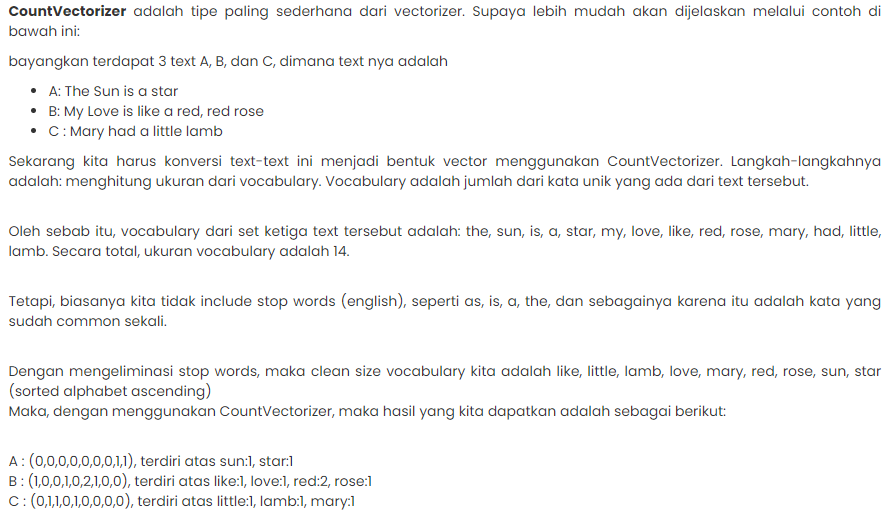

In [23]:
#import CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer

#definisikan CountVectorizer dan mengubah soup tadi menjadi bentuk vector
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(feature_df['soup'])

print(count)
print(count_matrix.shape)

CountVectorizer(stop_words='english')
(1060, 10026)


#### [Pertanyaan 4: Cara membuat model similarity antara count matrix](https://academy.dqlab.id/main/livecode/214/396/1986?pr=0)

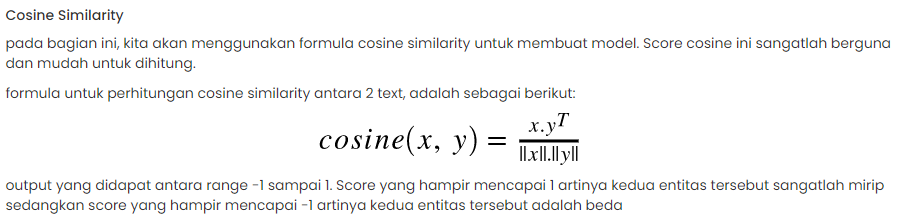

In [24]:
#Import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

#Gunakan cosine_similarity antara count_matrix 
cosine_sim = cosine_similarity(count_matrix, count_matrix)

#print hasilnya
print(cosine_sim)

[[1.         0.15430335 0.35355339 ... 0.         0.         0.13608276]
 [0.15430335 1.         0.10910895 ... 0.         0.         0.        ]
 [0.35355339 0.10910895 1.         ... 0.         0.08703883 0.09622504]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.08703883 ... 0.         1.         0.10050378]
 [0.13608276 0.         0.09622504 ... 0.         0.10050378 1.        ]]


#### [Pertanyaan 5: Cara membuat content based recommender system](https://academy.dqlab.id/main/livecode/214/396/1987?pr=0)

In [25]:
indices = pd.Series(feature_df.index, index=feature_df['title']).drop_duplicates()

def content_recommender(title):
    #mendapatkan index dari judul film (title) yang disebutkan
    idx = indices[title]

    #menjadikan list dari array similarity cosine sim 
    #hint: cosine_sim[idx]
    sim_scores = list(enumerate(cosine_sim[idx]))

    #mengurutkan film dari similarity tertinggi ke terendah
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #untuk mendapatkan list judul dari item kedua sampe ke 11
    sim_scores = sim_scores[1:11]

    #mendapatkan index dari judul-judul yang muncul di sim_scores
    movie_indices = [i[0] for i in sim_scores]

    #dengan menggunakan iloc, kita bisa panggil balik berdasarkan index dari movie_indices
    return base_df.iloc[movie_indices]

#aplikasikan function di atas
print(content_recommender('The Lion King'))

     knownForTitles                   cast_name      tconst titleType  \
848       tt3040964  [Cristina Carrión Márquez]   tt3040964     movie   
383       tt0286336          [Francisco Bretas]   tt0286336  tvSeries   
1002      tt7222086          [Hiroki Matsukawa]   tt7222086  tvSeries   
73        tt0075147             [Joaquín Parra]   tt0075147     movie   
232       tt0119051            [Chris Kosloski]   tt0119051     movie   
556      tt10068158          [Hiroki Matsukawa]  tt10068158     movie   
9         tt0028657            [Bernard Loftus]   tt0028657     movie   
191       tt0107875               [Simon Mayal]   tt0107875     movie   
803       tt2356464               [Sina Müller]   tt2356464     movie   
983       tt6270328                   [Jo Boag]   tt6270328  tvSeries   

                                         primaryTitle  \
848                                   The Jungle Book   
383                      The Animals of Farthing Wood   
1002                     